<a href="https://colab.research.google.com/github/tuankiet110301/CS114.L22.KHCL/blob/main/Handwritting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LỚP: CS114.L22.KHCL**
NHÓM:


1.   Từ Trương Tuấn Kiệt - 19521727
2.   Võ Khoa Nam - 19521877
3.   Phạm Trung Hiếu - 19521512







**1. DATA TRAINING**

Mẫu dữ liệu chữ số có sẵn trong thư viện **scikit-learn** có kích thước format 8x8 là một mảng chữ số thể hiện độ xám của điểm ảnh. Dữ liệu 4 số dưới đây là ví dụ 

In [79]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

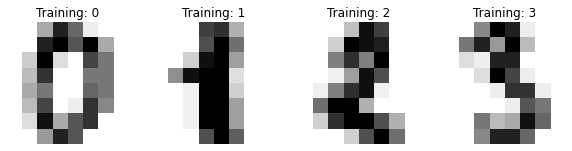

In [80]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Các dữ liệu đầu vào phải được chuyển đổi từ kích thước (8, 8) sang dạng vector (1, 64) để tiến hành phân lớp

**PHÂN LỚP**

Tiến hành chuyển đổi mảng 2 chiều (8, 8) của ảnh thành dạng (1, 64) với chỉ số gamma = 0.001 trong giải thuật SVM

In [81]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)


Tập dữ liệu được chia theo tỉ lệ 50% training 50% test ta có được demo như sau

In [82]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

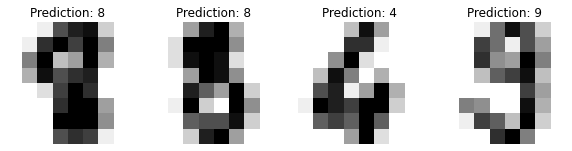

In [83]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

Module metrics.classification_report thực hiện đánh giá như sau



In [84]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Biểu đồ Confusion Matrix

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


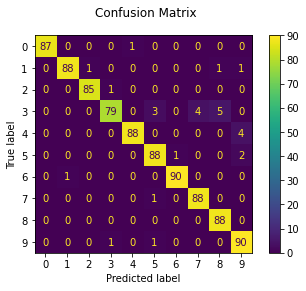

In [85]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


**2. Chụp ảnh chữ viết tay từ webcam và thực hiện nhận dạng**

In [86]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo_1.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Chụp ảnh từ webcam

In [ ]:

from IPython.display import Image
from google.colab.patches import cv2_imshow
import cv2

res = []

def take_img(num):
    i = 0
    while (i < 9):
        try:
            number = "im{0}{1}.jpg".format(num, i)
            filename = take_photo(number)
            print('Saved to {}'.format(filename))
            res.append([number, num])
        except Exception as err:
            # Errors will be thrown if the user does not have a webcam or if they do not
            # grant the page permission to access it.
            print(str(err))
        i += 1


Chụp ảnh 2 test cases số 2 và 4

In [ ]:
take_img(2)
take_img(4)

<IPython.core.display.Javascript object>

Saved to im20.jpg


<IPython.core.display.Javascript object>

Saved to im21.jpg


<IPython.core.display.Javascript object>

Saved to im22.jpg


<IPython.core.display.Javascript object>

Saved to im23.jpg


<IPython.core.display.Javascript object>

Saved to im24.jpg


<IPython.core.display.Javascript object>

Saved to im25.jpg


<IPython.core.display.Javascript object>

Saved to im26.jpg


<IPython.core.display.Javascript object>

Saved to im27.jpg


<IPython.core.display.Javascript object>

Saved to im28.jpg


<IPython.core.display.Javascript object>

Saved to im40.jpg


<IPython.core.display.Javascript object>

Saved to im41.jpg


<IPython.core.display.Javascript object>

Saved to im42.jpg


<IPython.core.display.Javascript object>

Saved to im43.jpg


<IPython.core.display.Javascript object>

Saved to im44.jpg


<IPython.core.display.Javascript object>

Saved to im45.jpg


<IPython.core.display.Javascript object>

Saved to im46.jpg


<IPython.core.display.Javascript object>

Saved to im47.jpg


<IPython.core.display.Javascript object>

Saved to im48.jpg


**Xử lý ảnh đã chụp**

Ảnh đã chụp có thể không có kích thước phù hợp ( không phải kích thước 8x8 ) nên cần được xử lý.

- Xử lý bo ảnh sát với chữ số cần nhận dạng theo độ sáng của từng pixel
- Resize ảnh về kích thước (8, 8)


Xử lý bo sát chữ số

Test cases số 2

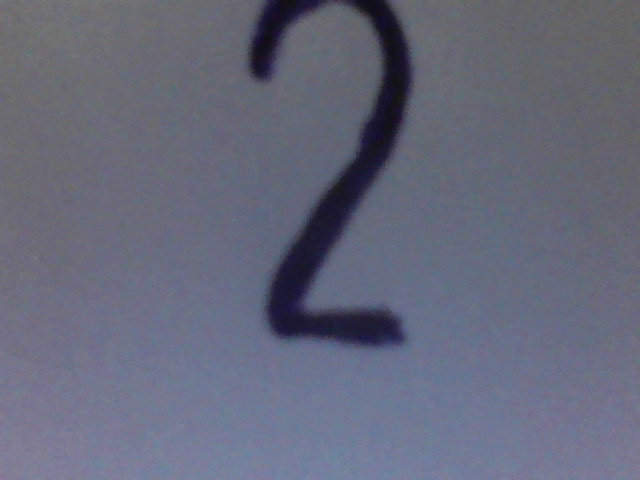

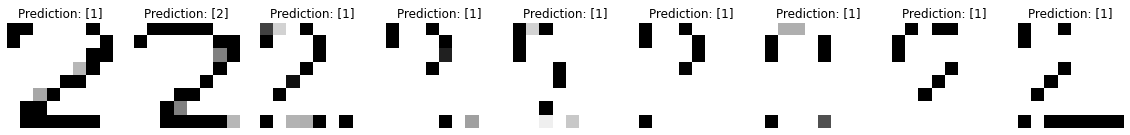

In [90]:
display(Image(res[0][0]))

pre = []
for x in res:
    im = cv2.imread(x[0], 0)
    im = 255 - im[:, :]

    #Tọa độ các góc để bo ảnh tạo sẵn ở chính giữa tấm ảnh
    top = im.shape[0] // 2
    bottom = im.shape[0] // 2
    left = im.shape[1] // 2
    right = im.shape[1] // 2

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if (im[i][j] > 200):
                if (top > i):
                    top = i
                if (bottom < i):
                    bottom = i
                if (left > j):
                    left = j
                if (right < j):
                    right = j
                im[i][j] = 255
            else:
                im[i][j] = 0
      
    strictedIm = im[top: bottom+1, left: right+1]
    #cv2_imshow(strictedIm)
    resizeIm = cv2.resize(strictedIm, (8, 8))
    #cv2_imshow(resizeIm)
    predictIm = resizeIm // 16


    #Đưa dữ liệu về vecto đặc trưng (1, 64)
    predicts = clf.predict(predictIm.reshape(1,64))
    pre.append([resizeIm, predicts])


_, axes = plt.subplots(nrows=1, ncols=9, figsize=(20, 3))
for ax, y in zip(axes, pre):
    ax.set_axis_off()
    image = y[0].reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {y[1]}')





Test cases số 4

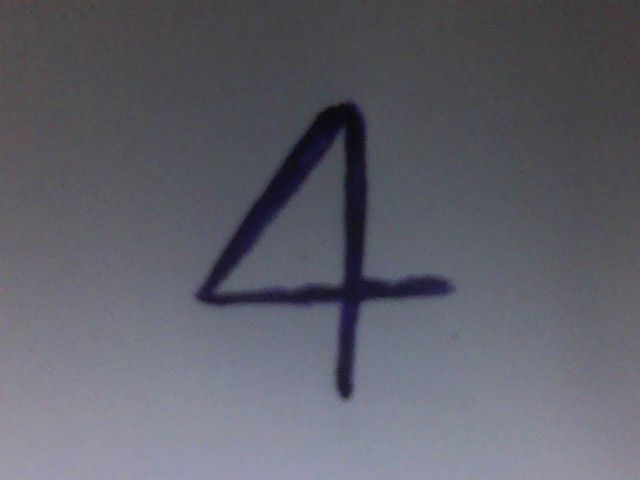

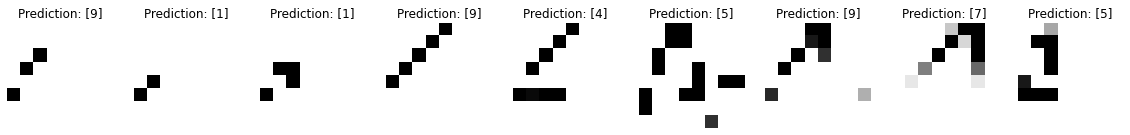

In [88]:
display(Image(res[9][0]))
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(20, 3))
for ax, y in zip(axes, pre[9:]):
    ax.set_axis_off()
    image = y[0].reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {y[1]}')

**TRẢ LỜI CÂU HỎI**



1.   Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

- Kết quả chạy thực tế với webcam của laptop và giấy viết tay thực sự không tốt ( 1/9 testcases là chính xác )


2.   Ủa mà nhìn vào đâu để kết luận là tốt hay không?

- Dựa vào kết quả thực nghiệm trên cho thấy tỉ lệ nhận dạng chính xác (predict) là rất thấp


3.   Nguyên nhân:

- Chữ viết tay của mỗi người sẽ có cách viết cùng 1 chữ số là đa dạng như số 2, 4, ...
- Môi trường lý tưởng để chụp hình chữ viết tay từ webcam là khác nhau:
  + Thiếu ánh sáng sẽ tạo những vùng tối và sáng khác nhau ảnh hưởng đến quá trình xử lý ảnh dẫn đến kết quả sai sót
  + Chất lượng webcam mỗi máy là khác nhau có thể cho chất lượng hình ảnh ban đầu thấp (nếu webcam chất lượng kém) dẫn đến việc sai sót trong nhận dạng chữ viết


4.   Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
- Theo nhóm chúng em, nếu khắc phục được những nguyên nhân kể trên thì việc ứng dụng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà là hoàn toàn khả thi:
  + Ta có thể chụp biển số nhà từ khoảng cách vừa đủ với chất lượng hình ảnh cao.
  + Ta có thể cắt khung tách từng chữ số trên biển số nhà riêng lẻ ra và tiến hành nhận dạng theo như model digits recognition ở trên và ghép từng kết quả lại ta sẽ nhận dạng được đầy đủ biển số nhà.
  
